In [ ]:
# Montamos nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Seleccionamos la carpeta y verificamos los contenidos
%cd "/content/drive/MyDrive/TC3002B-IA"
!ls

Mounted at /content/drive
/content/drive/MyDrive/TC3002B-IA
external-imgs  model  smile_no_smile_v1.h5


In [ ]:
# Importamos las bibliotecas de preprocesado de datos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.preprocessing import image

# Cargamos el modelo
model = tf.keras.models.load_model('smile_no_smile_v1.h5')

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 10)        280       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 31, 31, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 10)        910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1960)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

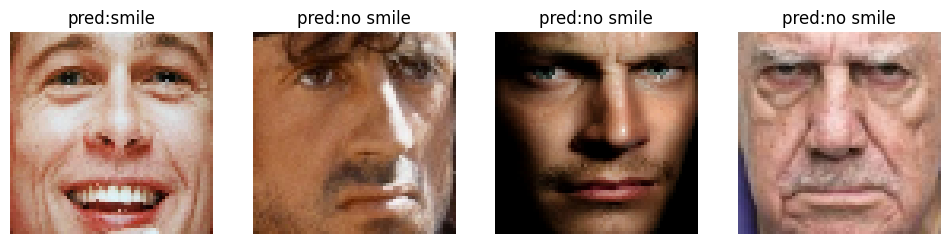

In [ ]:
# Procesado y predicción de imágenes

images = ['test1.png','test2.png','test3.png','test4.png']
labels = ["no smile", "smile"]
size = len(images)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, size, figsize=(size*3, 4))

i = 0

for test_img in images:
  img_path = 'external-imgs/'+ test_img
  img = image.load_img(img_path,  target_size=(64,64))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor /= 255.
  confidence = model.predict(img_tensor)
  predict_class = (confidence > 0.5).astype("int32")
  axarr[i].set_title("pred:" + labels[predict_class[0][0]])
  axarr[i].imshow(img)
  axarr[i].axis("off")
  i = i + 1

#print(prediction)

(64, 64, 3)
1/1 [==============================] - 0s 50ms/step
[[0.99654627]]
class  1 confindence
smile


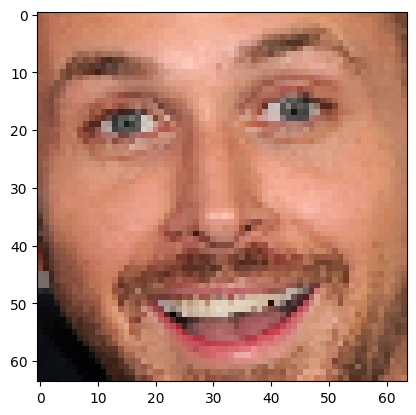

In [ ]:
# Con una sola img
test_img = 'test5.png'
img_path = 'external-imgs/'+ test_img   #image to be tested

#image preprocessing to be used
img = image.load_img(img_path,  target_size=(64,64))
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

#model response
confidence = model.predict(img_tensor)
predict_class = (confidence > 0.5).astype("int32")
print (confidence)
print ("class ", predict_class[0][0], "confindence", )

if predict_class[0][0] == 1:
  print("smile")
else:
  print("no smile")

plt.imshow(img_tensor[0])
plt.show()